### 1. Setup & Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from sklearn.metrics import classification_report, confusion_matrix
from src.preprocessing import load_data_from_directory
from src.model import train_model, load_trained_model
from src.prediction import predict_audio

2025-07-23 22:19:09.916978: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Load and Preprocess Data

In [2]:
X_train, y_train = load_data_from_directory("../data/train")
X_test, y_test = load_data_from_directory("../data/test")
print(f"Train: {X_train.shape}, Labels: {np.unique(y_train, return_counts=True)}")
print(f"Test: {X_test.shape}, Labels: {np.unique(y_test, return_counts=True)}")

[INFO] Loaded 480 samples from ../data/train
[INFO] Loaded 105 samples from ../data/test
Train: (480, 1024), Labels: (array([0, 1, 2, 3]), array([140,  80, 170,  90]))
Test: (105, 1024), Labels: (array([0, 1, 2, 3]), array([29, 21, 39, 16]))


### 3. Train the Model

In [3]:
model, history = train_model(X_train, y_train)

[INFO] Splitting data: train/test = 0.8/0.2
[INFO] Building model...
[INFO] Starting training...
Epoch 1/15
24/24 - 1s - 51ms/step - accuracy: 0.7188 - loss: 0.7878 - val_accuracy: 0.8542 - val_loss: 0.4740
Epoch 2/15
24/24 - 0s - 7ms/step - accuracy: 0.8958 - loss: 0.3351 - val_accuracy: 0.9062 - val_loss: 0.3026
Epoch 3/15
24/24 - 0s - 7ms/step - accuracy: 0.9193 - loss: 0.2636 - val_accuracy: 0.9062 - val_loss: 0.2973
Epoch 4/15
24/24 - 0s - 8ms/step - accuracy: 0.9479 - loss: 0.1825 - val_accuracy: 0.9062 - val_loss: 0.2632
Epoch 5/15
24/24 - 0s - 8ms/step - accuracy: 0.9661 - loss: 0.1511 - val_accuracy: 0.9167 - val_loss: 0.2652
Epoch 6/15
24/24 - 0s - 7ms/step - accuracy: 0.9635 - loss: 0.1356 - val_accuracy: 0.8958 - val_loss: 0.2738
Epoch 7/15
24/24 - 0s - 7ms/step - accuracy: 0.9635 - loss: 0.1212 - val_accuracy: 0.9167 - val_loss: 0.2343
Epoch 8/15
24/24 - 0s - 7ms/step - accuracy: 0.9714 - loss: 0.1130 - val_accuracy: 0.9167 - val_loss: 0.2467
Epoch 9/15
24/24 - 0s - 7ms/st

[INFO] Model saved to models/yamnet_sesa_model.h5


### 4. Evaluate Model

In [4]:
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print(classification_report(y_test, y_pred, target_names=["Casual", "Gunshot", "Explosion", "Siren/Alarm"]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

      Casual       0.89      0.83      0.86        29
     Gunshot       0.90      0.86      0.88        21
   Explosion       0.93      0.95      0.94        39
 Siren/Alarm       0.89      1.00      0.94        16

    accuracy                           0.90       105
   macro avg       0.90      0.91      0.90       105
weighted avg       0.90      0.90      0.90       105



### 5. Confusion Matrix

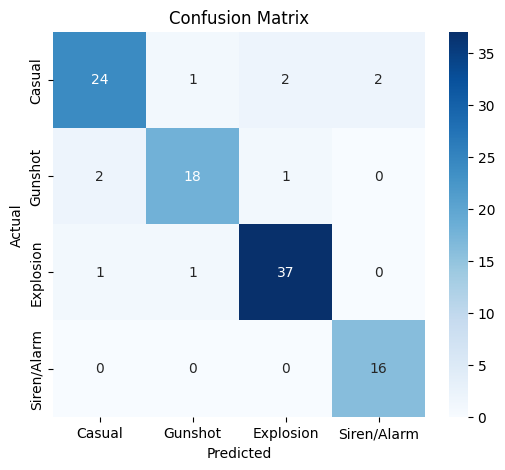

In [5]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Casual", "Gunshot", "Explosion", "Siren/Alarm"], yticklabels=["Casual", "Gunshot", "Explosion", "Siren/Alarm"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 6. Save Model

In [6]:
model.save("../models/yamnet_sesa_model.h5")

### 7. Test on a Single .wav File

In [25]:

result = predict_audio("../data/test/gunshot_061.wav", model)
print(f"Predicted: {result['label']} with confidence {result['confidence']:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicted: Gunshot with confidence 0.98
